# Manual calibration of an SIR model (part 1)

Over the past weeks, you have learnt about how to code infectious disease models, and how they behave. 

As explained in the lectures, the next step is to make sure that your model is able to capture real-world data. In this exercise you will learn how to do this, with some simple examples. The cell below contains the epidemic data you will be working with, with a column for the time in days, and a column for the prevalence of infection on each day.

To familiarise yourself with the data, first plot the epidemic curve.

### Question: Based on the plot, what does the data represent?

Loading required package: ggplot2


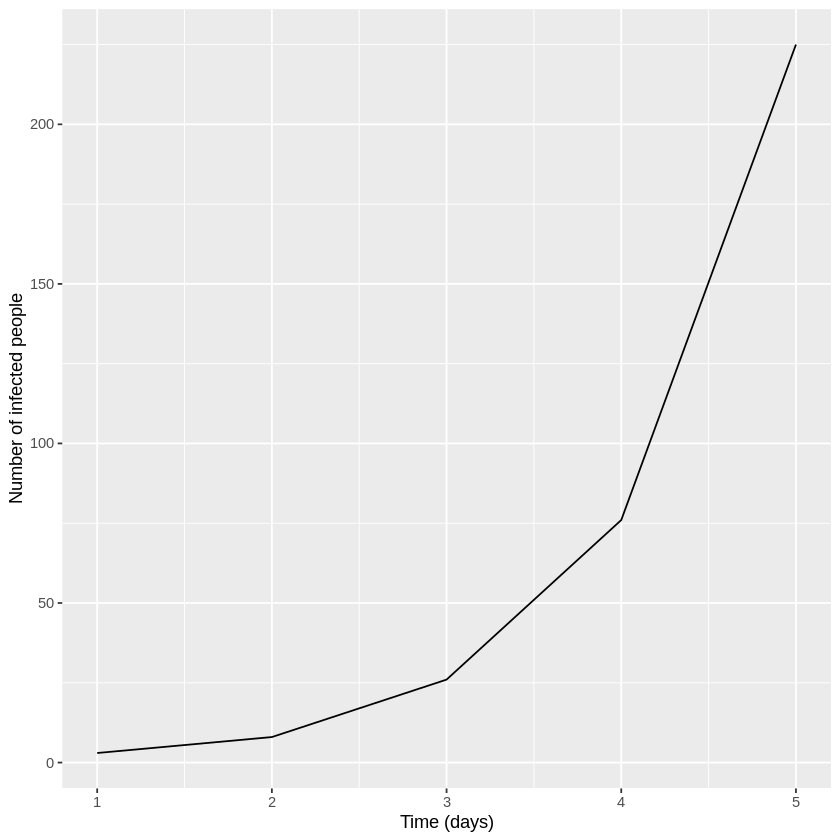

In [1]:
data <- data.frame(time = 1:5,
                   number_infected = c(3,8,26,76,225))

require(ggplot2)
ggplot(data = data) +
geom_line(aes(x = time, y = number_infected)) + 
labs(x = "Time (days)", y = "Number of infected people")

Now, your task is to calibrate a simple SIR model to this data, i.e. find the combination of $\beta$ and $\gamma$ that best reproduces the data. For this exercise, you will do a manual calibration, which means you vary the parameter values manually and compare the model output with the data visually. Through trial-and-error, you find the best parameter values. In later exercises you will learn how to do this more efficiently. To begin with, this manual approach should help to familiarise you with what is happening when you calibrate a model.

Below, we have provided you with the SIR model code that you are already very familiar with. Take a moment to look through this code, to make sure you understand what it represents. As you can see, we are simulating the epidemic for the same duration that we have data for.

### Question: Based on the code, what is the total size of the population you are modelling? For plotting, which variables in the model output correspond to the variables in the dataset? 

In [ ]:
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

times <- seq(from = 0, to = 6, by = 0.1)

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })

Now, use the cell below to write code to specify values for $\beta$ and $\gamma$, solve the model, and plot the model output and the data in the same graph. This plot will show how well your model prediction fits to the data.

*Hint: for time series data like this, it is common practice to plot the model output over time as a line, and overlay the data as points (ideally in a different colour). In ggplot, the commands for this are geom_line() and geom_point() respectively. You can either combine the model output and dataset into the same dataframe, or you might find it easier to define the 'data' and 'aes' arguments in the geom_line and geom_point commands separately. Of course, if you prefer you can also use base R plotting commands (plot()).*

In your code above, try different values for $\beta$ and $\gamma$ until you find a combination that produces an output closely matching the observed data. If you don't know where to start, remember that we are modelling the epidemic in units of days, and remind yourself of the condition that $\beta$ and $\gamma$ need to fulfill to observe an outbreak.

**Example of the manual calibration:**

As an arbitrary choice of parameters, let's first try $\beta$ = 0.6 days$^{-1}$, and $\gamma$ = 0.1 days$^{-1}$ (remembering that we want $\beta$/$\gamma$ > 1, so that $\beta$ > $\gamma$).

Loading required package: deSolve
Loading required package: reshape2


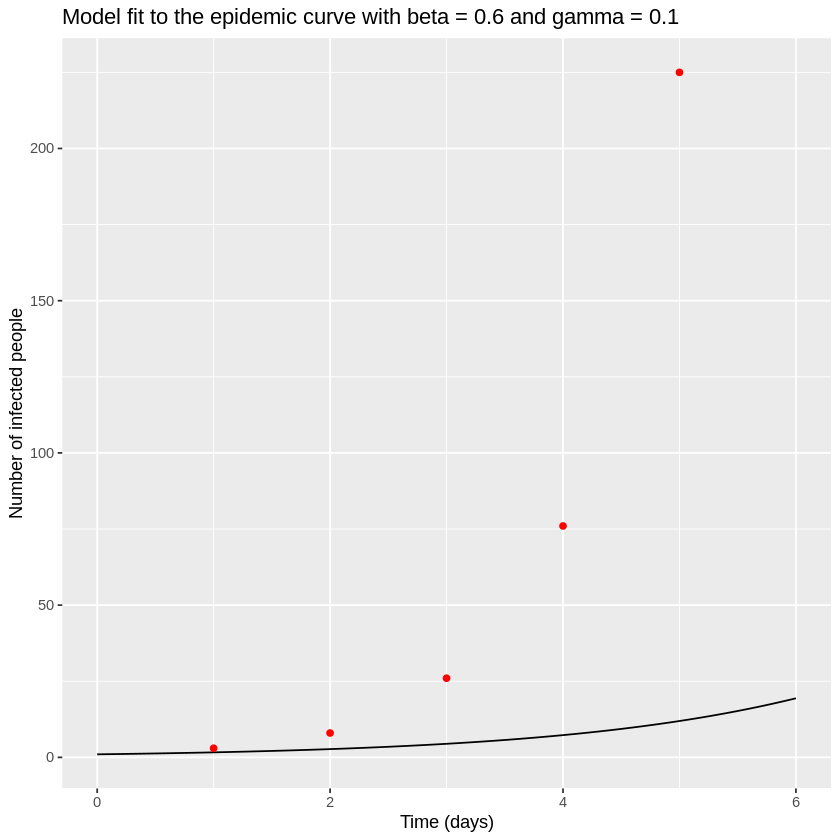

In [2]:
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

# Adding the parameters vector
parameters <- c(beta = 0.6,
                gamma = 0.1)

times <- seq(from = 0, to = 6, by = 0.1)

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}
    
    
# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +      # plot the model prediction of the
                                                        # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected)
             , colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =",
                     parameters["beta"], 
                     "and gamma =", parameters["gamma"]))


With this parameter combination, the model strongly underestimates the growth of the epidemic. Let's try increasing $\beta$ to 1.5 and reducing $\gamma$ to 0.02 to get a closer match.

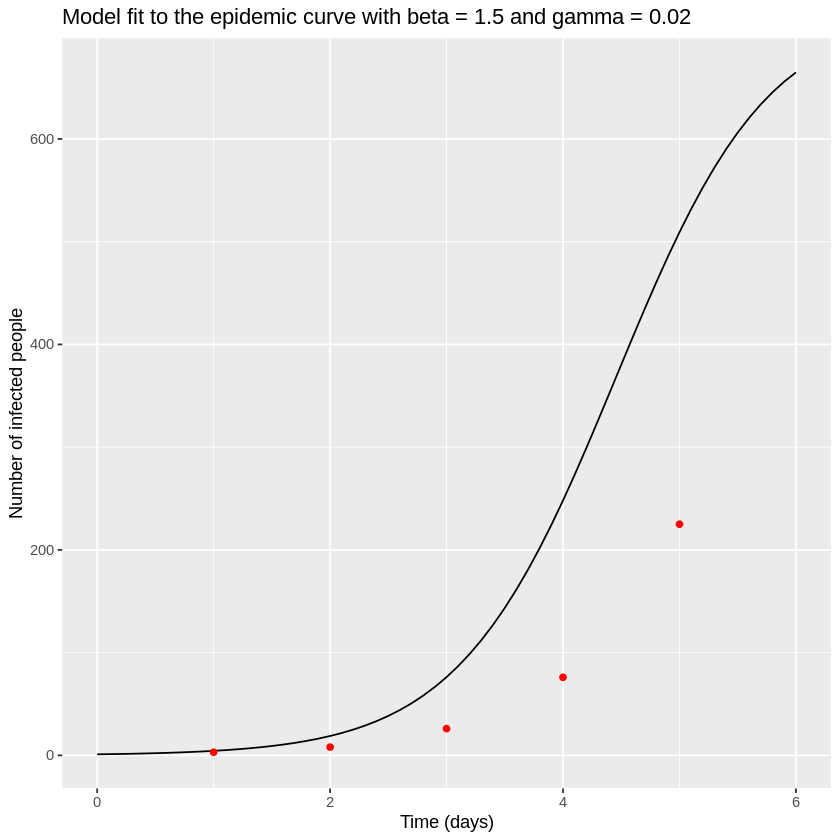

In [3]:
parameters <- c(beta = 1.5,
                gamma = 0.02)

# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +      # plot the model prediction of the
                                                        # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), 
             colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", 
                     parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

Now we have the opposite problem. With these parameter values, the number of infected people is overestimated by the model at all but the first timepoint. Let's try reducing $\beta$ again.

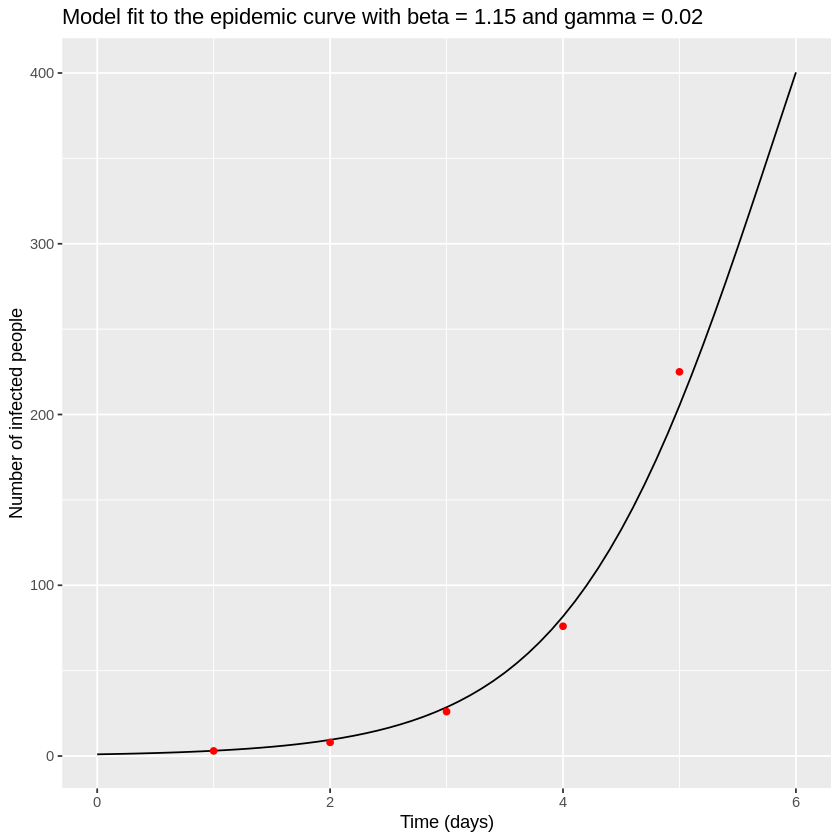

In [4]:
parameters <- c(beta = 1.15,
                gamma = 0.02)

# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +      # plot the model prediction of the
                                                        # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), 
             colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", 
                     parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

### Question: Which value for $\beta$ and value for $\gamma$ did you find to give the best fit to the data? 

With $\beta$ = 1.15 and $\gamma$ = 0.02 days$^{-1}$, the fit of the model prediction of the number of infected people over time to the data is looking quite good!